<a href="https://colab.research.google.com/github/dforsberg1/ML_Intro/blob/main/Machine_Learning_Workshop_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Workshop 004**

**Lesson Plan:**

1.   Polynomial Regressions


*   Quadratic: $$y = \beta_0 + \beta_1x + \beta_2x^2$$
*   Cubic: $$y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$$
*   Higher Order Polynomial: $$y = \beta_0 + \beta_1x + \beta_2x^2 + \ ... \ + \beta_{n-1}x^{n-1} + \beta_nx^n$$





Import necessary packages & functions:

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def compute_cost(X, y, b): 
    m = X.shape[0]
    f_b = np.dot(X, b)
    cost = (1/(2*m))*sum((f_b - y)**2)
    return cost

def compute_gradients(X, y, b):
    m = X.shape[0] # number of training examples
    y_pred = np.dot(X, b) # predictions of the model
    db = np.dot(X.T, (y_pred - y)) / m # gradient of linear regression w.r.t. the parameter, b_j
    return db

def gradient_descent(X, y, b_in, cost_function, gradient_function, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    b = copy.deepcopy(b_in)  # avoid modifying global b within function
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db = gradient_function(X, y, b)   

        # Update Parameters using b, alpha and gradient
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:>{len(str(num_iters))}d}:  Cost:{J_history[-1]:>{len(str(max(J_history))) - 5}.2f}")
    return b, J_history #return final b and J history for graphing

def zscore_normalize_features(X, rtn_ms=False):
    mu     = np.mean(X,axis=0)  
    sigma  = np.std(X,axis=0)
    X_norm = (X - mu)/sigma      

    if rtn_ms:
        return(X_norm, mu, sigma)
    else:
        return(X_norm)

# Data that follows a Quadratic Function

In [3]:
# set random seed for reproducibility
np.random.seed(42)

m = 250

# generate m observations of X between 0 and 100
X = np.random.uniform(low=0, high=100, size=m)

# calculate Y as X^2 with some random noise
noise = np.random.normal(loc=0, scale=500, size=m)
Y = 2000 + X**2 + 0.5*noise + 0.01*X*noise
Y = Y.ravel()

# create a dataset by combining X and Y
data = np.column_stack((X, Y))

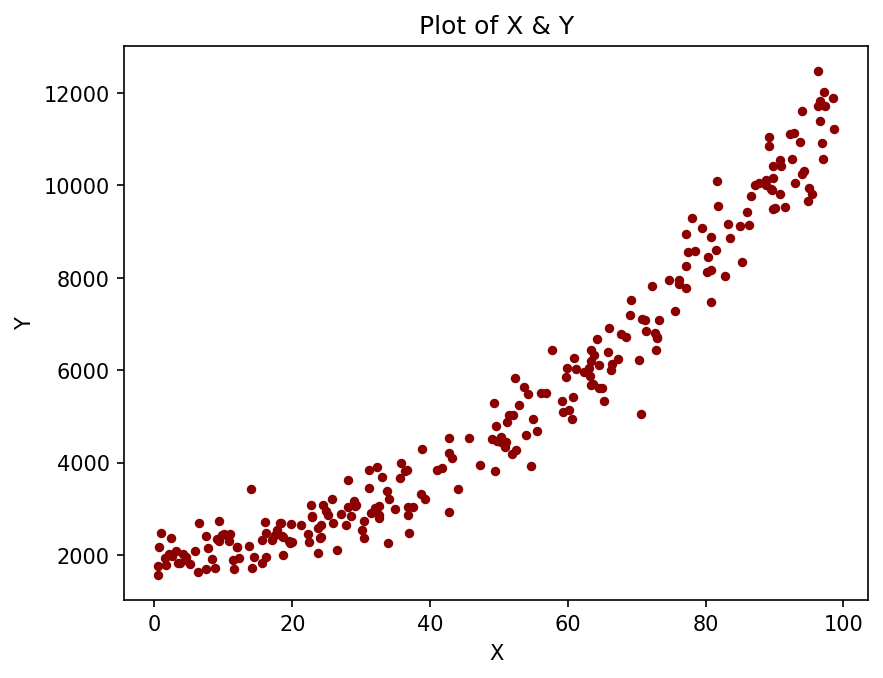

In [4]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(X, Y, marker='.', s=50, c='darkred')
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

In [5]:
# Create a vector of 1's with length = # of training examples
x0 = np.ones(X.shape[0]).astype(int)

# Use the function np.hstack to create a column of 1's in X_train
X_train = np.column_stack((x0, X))

In [6]:
# Initialize all parameters to zero
b_in = np.zeros(X_train.shape[1])

# Some gradient descent settings
iterations = 100000
alpha = 0.0005

# Run gradient descent algorithm
b_final, J_hist = gradient_descent(X_train, Y, b_in, compute_cost, compute_gradients, alpha, iterations)

Iteration      0:  Cost:  8005627.77
Iteration  10000:  Cost:   386608.04
Iteration  20000:  Cost:   384621.91
Iteration  30000:  Cost:   384485.87
Iteration  40000:  Cost:   384476.55
Iteration  50000:  Cost:   384475.92
Iteration  60000:  Cost:   384475.87
Iteration  70000:  Cost:   384475.87
Iteration  80000:  Cost:   384475.87
Iteration  90000:  Cost:   384475.87


In [7]:
print(b_final)

[483.4899859   98.40459294]


In [8]:
y_pred1 = b_final[0] + X * b_final[1]

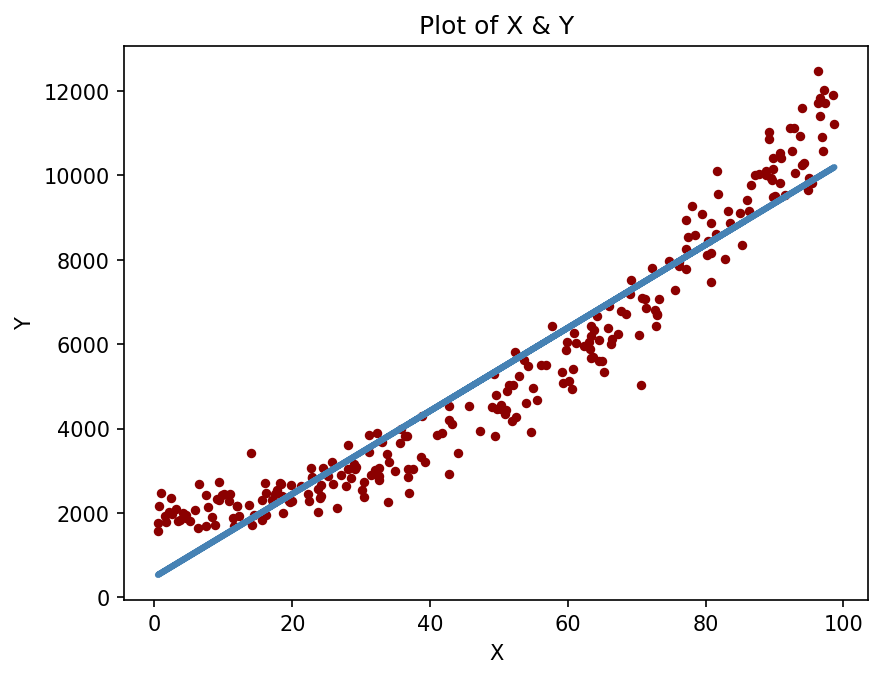

In [9]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(X, Y, marker='.', s=50, c='darkred')
# Plot our model predictions
plt.plot(X, y_pred1, c='steelblue', label='Our Prediction', linewidth=3)
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

Using the sci-kit-learn package, let's fit this data using a simple linear model

In [10]:
scaler = StandardScaler() # This scales the features using Z-score Normalization
X_norm = scaler.fit_transform(X.reshape(-1,1)) 

# create an instance of the SGDRegressor class with a constant learning rate
model = SGDRegressor(loss='squared_error', max_iter=100000, learning_rate='constant', eta0=0.0005, fit_intercept=True)

# fit the model to the data
model.fit(X_norm, Y)

# The bias and weight(s) parameters using normalized feature inputs (i.e., after feature scaling)
print('Scaled Bias:', model.intercept_)
print('Scaled Weight(s):', model.coef_)

# Assign beta values to variable
b_final2_scaled = np.array([model.intercept_, model.coef_]).reshape(1, 2)
b_final2_scaled = np.squeeze(b_final2_scaled)

Scaled Bias: [5307.91948014]
Scaled Weight(s): [2919.94138791]


In [11]:
# Calculate mean and sd of unscaled feature
mean_x1 = np.mean(X_train[:,1])
std_x1 = np.std(X_train[:,1])

# Calculate the old parameters using the z-score normalized features
b0_unscaled = b_final2_scaled[0] - ((mean_x1 / std_x1) * b_final2_scaled[1])
b1_unscaled = b_final2_scaled[1] / std_x1

# Create array with unscaled paramters from scikit-learn
b_final2 = np.hstack((b0_unscaled, b1_unscaled))

Compare the results (manual vs. scikit-learn):

In [12]:
print(f"Manual approach: {b_final}")

Manual approach: [483.4899859   98.40459294]


In [13]:
print(f"scikit-learn approach:{b_final2}")

scikit-learn approach:[483.90760828  98.36587727]


Results from sci-kit-learn are very similar to those calculated using manual gradient descent

In [14]:
y_pred2 = b_final2[0] + X * b_final2[1]

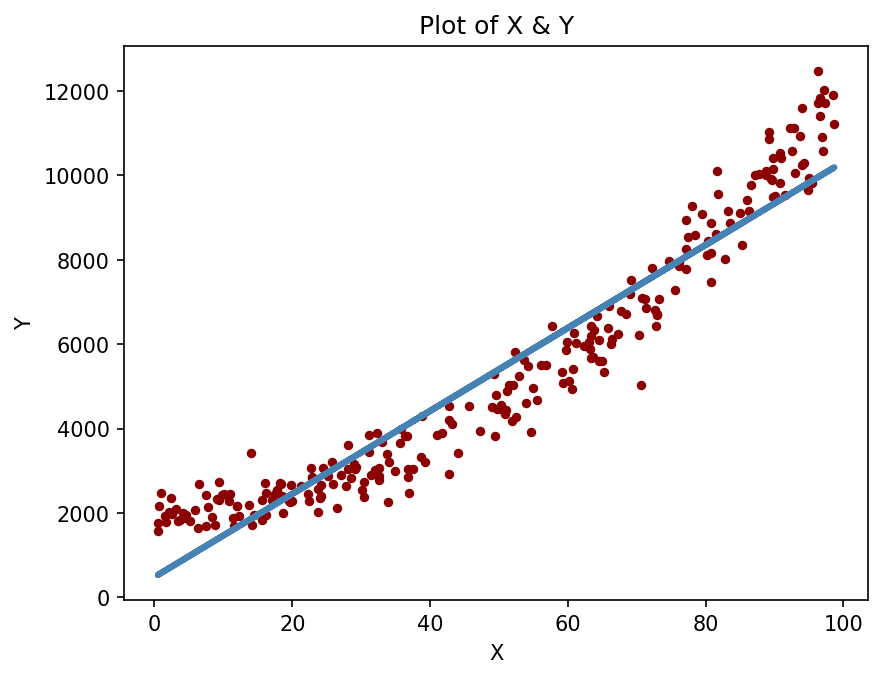

In [15]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(X, Y, marker='.', s=50, c='darkred')
# Plot our model predictions
plt.plot(X, y_pred2, c='steelblue', label='Our Prediction', linewidth=3)
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

# Compare costs of two approaches

Cost from manual approach:

In [16]:
compute_cost(X_train, Y, b_final)

384475.86819301394

Cost from scikit-learn model:

In [17]:
# Create a vector of 1's with length = # of training examples
x0_norm = np.ones(X_norm.shape[0]).astype(int)

# Use the function np.hstack to create a column of 1's in X_train
Z_train = np.column_stack((x0_norm, X_norm))

In [18]:
compute_cost(X_train, Y, b_final2) # After converting to "unscaled" parameters

384477.6252645266

In [19]:
compute_cost(Z_train, Y, b_final2_scaled) # Using scaled parameters and scaled data

384477.6252645266

Manual approach appears to be *slightly* better than scikit-learn

# Now Include a quadratic term for x in the training data set, i.e., $x^2$

In [20]:
# Add x^2 as third column to training data set
X_train3 = np.hstack((X_train, np.power(X_train[:, 1], 2).reshape(-1, 1)))

Run gradient descent with quadratic term

In [21]:
# Initialize all parameters to zero
b_in3 = np.zeros(X_train3.shape[1])

# Some gradient descent settings
iterations = 100000
alpha = 0.00000001

# Run gradient descent algorithm
b_final3, J_hist3 = gradient_descent(X_train3, Y, b_in3, compute_cost, compute_gradients, alpha, iterations)

Iteration      0:  Cost:  12377415.42
Iteration  10000:  Cost:   1070917.37
Iteration  20000:  Cost:   1043246.79
Iteration  30000:  Cost:   1016668.29
Iteration  40000:  Cost:    991138.75
Iteration  50000:  Cost:    966616.77
Iteration  60000:  Cost:    943062.57
Iteration  70000:  Cost:    920437.94
Iteration  80000:  Cost:    898706.20
Iteration  90000:  Cost:    877832.09


In [22]:
# Print new parameters
print(b_final3)

[ 0.88330476 15.51849618  1.13400097]


In [23]:
y_pred3 = X_train3 @ b_final3

In [24]:
# Sort the X_train[:,1] values and correspondingly sort the y_pred3 values (for graphing purposes)
sorted_indices = np.argsort(X_train3[:,1])
X_train_sorted = X_train3[:,1][sorted_indices]
y_pred3_sorted = y_pred3[sorted_indices]

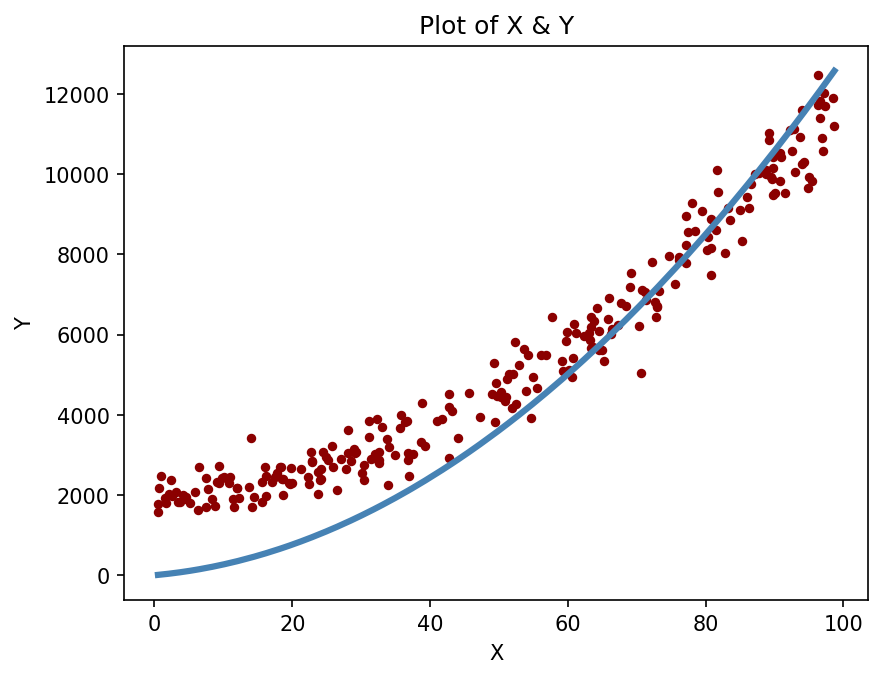

In [25]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(X_train[:,1], Y, marker='.', s=50, c='darkred')
# Plot our model predictions
plt.plot(X_train_sorted, y_pred3_sorted, c='steelblue', label='Our Prediction', linewidth=3)
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

Gradient descent fails to capture the bias correctly... Perhaps we can improve the performance by scaling the features.

In [26]:
# Add mean_normalization
X_train3_scaled = np.ones(X_train3.shape)
X_train3_features = X_train3[:,1:]
X_train_features3_scaled = zscore_normalize_features(X_train3_features)
X_train3_scaled = np.column_stack((x0, X_train_features3_scaled))

In [27]:
# Find shape of scaled feature matrix
X_train3_scaled.shape

(250, 3)

In [28]:
# Initialize all parameters to zero
b_in3 = np.zeros(X_train3_scaled.shape[1])

# Some gradient descent settings
iterations = 30000 # We can reduce the number of iterations...
alpha = 0.01 # And notice that we can use a much larger learning rate after feature scaling without getting errors

# Run gradient descent algorithm
b_final3_scaled, J_hist3_scaled = gradient_descent(X_train3_scaled, Y, b_in3, compute_cost, compute_gradients, alpha, iterations)

Iteration     0:  Cost:  18291078.23
Iteration  3000:  Cost:    132971.00
Iteration  6000:  Cost:    124186.65
Iteration  9000:  Cost:    122756.56
Iteration 12000:  Cost:    122523.74
Iteration 15000:  Cost:    122485.84
Iteration 18000:  Cost:    122479.67
Iteration 21000:  Cost:    122478.66
Iteration 24000:  Cost:    122478.50
Iteration 27000:  Cost:    122478.47


In [29]:
# Print new parameters
print(b_final3_scaled)

[5309.40072803   45.44984617 2965.34534027]


In [30]:
y_pred3_scaled = X_train3_scaled @ b_final3_scaled

In [31]:
# Sort the X_train[:,1] values and correspondingly sort the y_pred3 values (for graphing purposes)
sorted_indices = np.argsort(X_train3[:,1])
X_train_sorted = X_train3[:,1][sorted_indices]
y_pred3_scaled_sorted = y_pred3_scaled[sorted_indices]

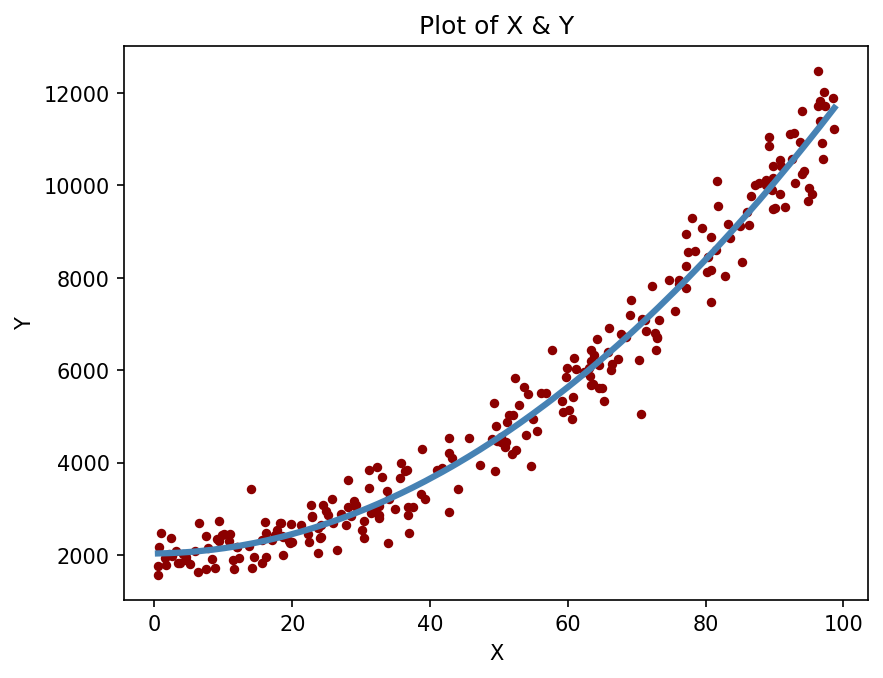

In [32]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(X_train[:,1], Y, marker='.', s=50, c='darkred')
# Plot our model predictions
plt.plot(X_train_sorted, y_pred3_scaled_sorted, c='steelblue', label='Our Prediction', linewidth=3)
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

In [33]:
# Get a list of all variables
variables = %who_ls

# Filter variables that you've intentionally created
intentional_variables = [var for var in variables if not var.startswith('_')]

# List of functions to keep
functions_to_keep = ['compute_cost', 'compute_gradients', 'gradient_descent', 'zscore_normalize_features']

# List of modules to keep
modules_to_keep = ['copy', 'math', 'np', 'plt', 'mpl', 'pd', 'SGDRegressor', 'StandardScaler', 'LinearRegression', 'PolynomialFeatures']

# Remove items in intentional_variables that are in functions_to_keep and modules_to_keep
intentional_variables = [var for var in intentional_variables if var not in functions_to_keep and var not in modules_to_keep]

In [34]:
# Delete intentional variables
for var in intentional_variables:
    del globals()[var]

# Data that follows a Cubic Function

In [35]:
# set random seed for reproducibility
np.random.seed(42)

n1 = 180
n2 = 60

# generate n1+n2 observations of X between 0 and 125
X1 = np.random.uniform(low=0, high=125, size=n1)
X2 = np.random.uniform(low=-5, high=25, size=n2)

# create noise for n1 observations
noise1 = np.random.normal(loc=0, scale=20, size=n1)
# create noise for n2 observations with wider variance (scale)
noise2 = np.random.normal(loc=0, scale=40, size=n2)

Y1 = 3000 + 235*X1 - 3.8*(X1**2) + 0.02*(X1**3) - 15*noise1 + 0.008*X1*noise1 - 0.0008*(X1**2)*noise1
Y2 = 3000 + 235*X2 - 4.0*(X2**2) + 0.02*(X2**3) - 15*noise2 + 0.008*X2*noise2 - 0.0008*(X2**2)*noise2

# concatenate X1 and X2 along the first axis (rows)
X = np.hstack((X1, X2))

# combine noise1 and noise2
Y = np.hstack((Y1, Y2))
Y = Y.ravel()

# create a dataset by combining X and Y
data = np.column_stack((X, Y))

# Create a boolean mask for rows where Y < 0
mask = data[:, -1] >= 0

# Use the mask to extract rows where Y >= 0
data = data[mask]

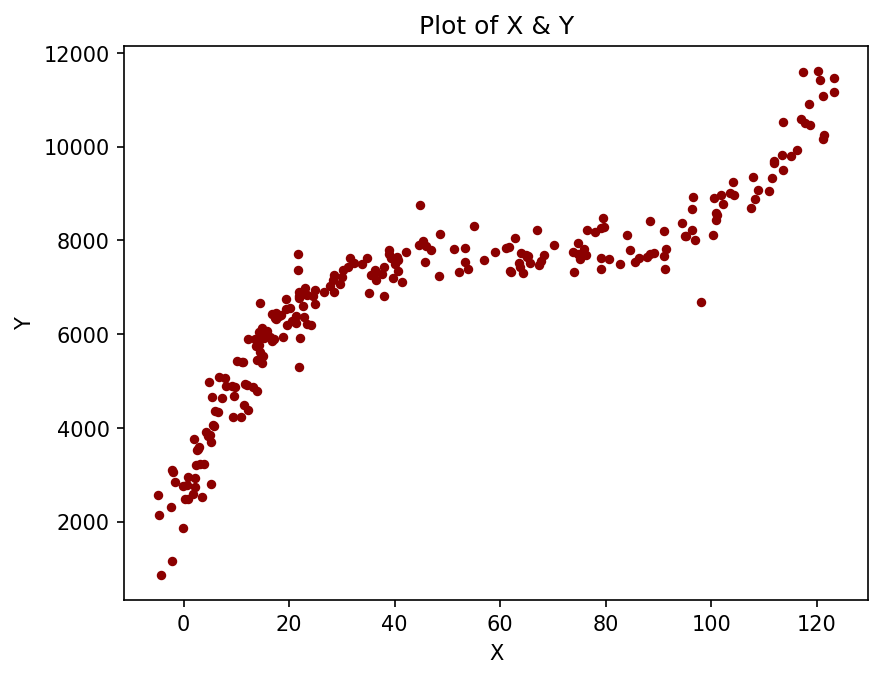

In [36]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(data[:,0], data[:,1], marker='.', s=50, c='darkred')
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

In [37]:
X = data[:,0];
Y = data[:,1];

In [38]:
# Create a vector of 1's with length = # of training examples
x0 = np.ones(X.shape[0]).astype(int)

# Use the function np.hstack to create a column of 1's in X_train
X_train = np.column_stack((x0, X))

In [39]:
# Initialize all parameters to zero
b_in = np.zeros(X_train.shape[1])

# Some gradient descent settings
iterations = 100000
alpha = 0.0001

# Run gradient descent algorithm
b_final, J_hist = gradient_descent(X_train, Y, b_in, compute_cost, compute_gradients, alpha, iterations)

Iteration      0:  Cost:  12964668.17
Iteration  10000:  Cost:   2405649.36
Iteration  20000:  Cost:   1365441.47
Iteration  30000:  Cost:    900081.93
Iteration  40000:  Cost:    691893.26
Iteration  50000:  Cost:    598755.54
Iteration  60000:  Cost:    557088.37
Iteration  70000:  Cost:    538447.65
Iteration  80000:  Cost:    530108.33
Iteration  90000:  Cost:    526377.55


In [40]:
y_pred1 = b_final[0] + X * b_final[1]

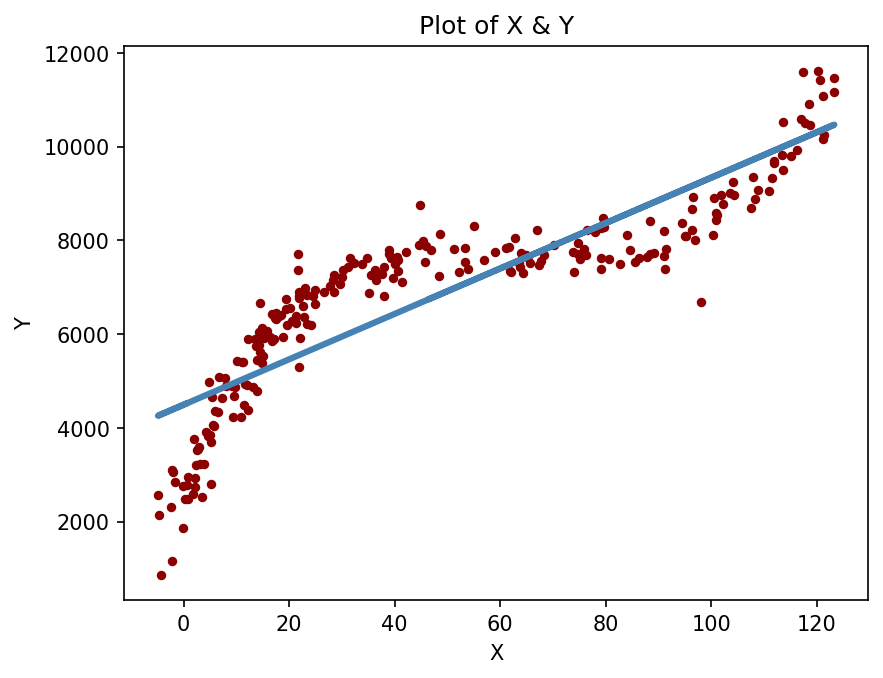

In [41]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(data[:,0], data[:,1], marker='.', s=50, c='darkred')
# Plot our model predictions
plt.plot(X, y_pred1, c='steelblue', label='Our Prediction', linewidth=3)
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

In [42]:
# Add x^2 and x^3 to training data set
X_train2 = np.hstack((X_train, np.power(X_train[:, 1], 2).reshape(-1, 1), np.power(X_train[:, 1], 3).reshape(-1, 1)))

In [43]:
# Engineer features
# X = np.c_[x, x**2, x**3]

In [44]:
# Initialize all parameters to zero
b_in2 = np.zeros(X_train2.shape[1])

# Some gradient descent settings
iterations = 120000
alpha = 0.0000000000045

# Run gradient descent algorithm
b_final2, J_hist2 = gradient_descent(X_train2, Y, b_in2, compute_cost, compute_gradients, alpha, iterations)

Iteration      0:  Cost:  18620734.69
Iteration  12000:  Cost:  11965609.80
Iteration  24000:  Cost:  11418957.21
Iteration  36000:  Cost:  10924985.60
Iteration  48000:  Cost:  10478617.79
Iteration  60000:  Cost:  10075265.88
Iteration  72000:  Cost:   9710784.16
Iteration  84000:  Cost:   9381426.46
Iteration  96000:  Cost:   9083807.65
Iteration 108000:  Cost:   8991139.78


In [45]:
print(b_final2)

[ 0.00195309  0.0498315   1.45321693 -0.00536797]


In [46]:
y_pred2 = X_train2 @ b_final2

In [47]:
# Sort the X_train[:,1] values and correspondingly sort the y_pred3 values (for graphing purposes)
sorted_indices = np.argsort(X_train2[:,1])
X_train2_sorted = X_train2[:,1][sorted_indices]
y_pred2_sorted = y_pred2[sorted_indices]

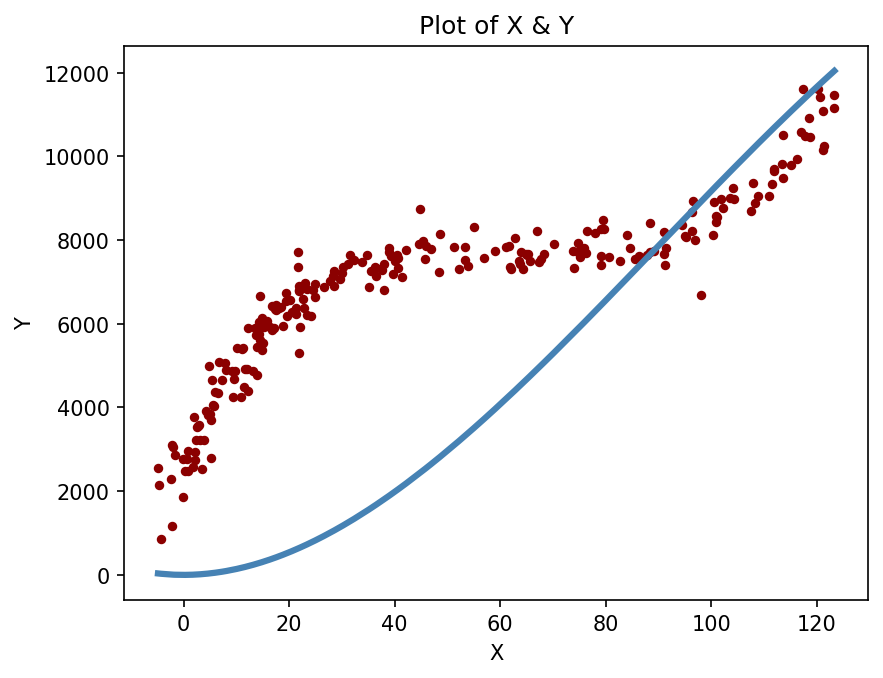

In [48]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(data[:,0], data[:,1], marker='.', s=50, c='darkred')
# Plot our model predictions
plt.plot(X_train2_sorted, y_pred2_sorted, c='steelblue', label='Our Prediction', linewidth=3)
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

In [49]:
# Add mean_normalization
X_train_scaled = np.ones(X_train2.shape)
X_train_features = X_train2[:,1:]
X_train_features_scaled = zscore_normalize_features(X_train_features)
X_train_scaled = np.column_stack((x0, X_train_features_scaled))
X_train_scaled.shape

(240, 4)

In [50]:
# Some gradient descent settings
iterations = 25000
alpha = 0.3

# Run gradient descent algorithm
b_final_scaled, J_hist_scaled = gradient_descent(X_train_scaled, Y, b_in2, compute_cost, compute_gradients, alpha, iterations)

Iteration     0:  Cost:  12059521.50
Iteration  2500:  Cost:    129718.08
Iteration  5000:  Cost:     96696.46
Iteration  7500:  Cost:     93721.50
Iteration 10000:  Cost:     93453.48
Iteration 12500:  Cost:     93429.34
Iteration 15000:  Cost:     93427.16
Iteration 17500:  Cost:     93426.97
Iteration 20000:  Cost:     93426.95
Iteration 22500:  Cost:     93426.95


In [51]:
b_final_scaled

array([  6792.06854168,   9390.62307309, -17684.93685558,  10408.25980858])

In [52]:
y_pred4 = X_train_scaled @ b_final_scaled

In [53]:
# Sort the X_train[:,1] values and correspondingly sort the y_pred3 values (for graphing purposes)
sorted_indices = np.argsort(X_train_scaled[:,1])
X_train_scaled_sorted = X_train_scaled[:,1][sorted_indices]
y_pred4_sorted = y_pred4[sorted_indices]

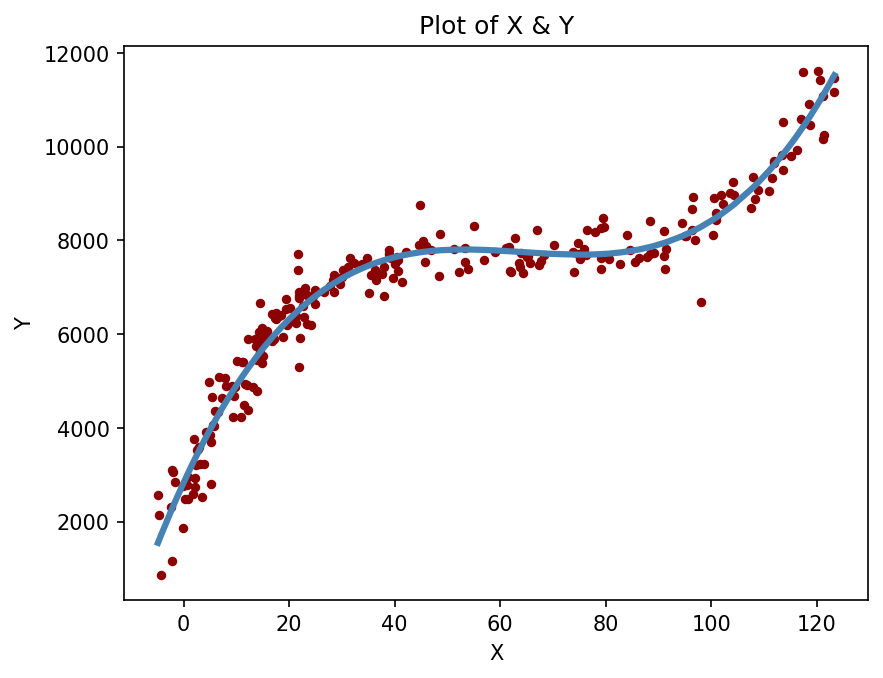

In [54]:
# Set default plot resolution to 150 dpi
plt.rcParams['figure.dpi'] = 150

# Plot the data points
plt.scatter(data[:,0], data[:,1], marker='.', s=50, c='darkred')
# Plot our model predictions
plt.plot(X_train2_sorted, y_pred4_sorted, c='steelblue', label='Our Prediction', linewidth=3)
# Set the title
plt.title("Plot of X & Y")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
# Display the plot
plt.show()

In [55]:
b_final_scaled

array([  6792.06854168,   9390.62307309, -17684.93685558,  10408.25980858])

Compare to polynomial regression with scikit-learn LinearRegression() Model

In [56]:
X_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X.reshape(-1,1))

In [57]:
model = LinearRegression().fit(X_, Y)

In [58]:
r_sq = model.score(X_, Y)
coefficients = np.concatenate([np.array([model.intercept_]), model.coef_], axis=0)

print(f"coefficient of determination: {r_sq}")
print(f"coefficients: {coefficients}")

coefficient of determination: 0.957076768027073
coefficients: [ 2.83012909e+03  2.44624693e+02 -3.92422481e+00  2.03642228e-02]


In [59]:
b0_new = b_final_scaled[0];
b1_new = b_final_scaled[1];
b2_new = b_final_scaled[2];
b3_new = b_final_scaled[3];

In [60]:
# Assuming you have the mean and standard deviation of each feature in the training data set
mean_x1 = np.mean(X_[:,0])
std_x1 = np.std(X_[:,0])
mean_x2 = np.mean(X_[:,1])
std_x2 = np.std(X_[:,1])
mean_x3 = np.mean(X_[:,2])
std_x3 = np.std(X_[:,2])

# Calculate the old parameters using the z-score normalized features
b0_old = b0_new - ((mean_x1 / std_x1) * b1_new) - ((mean_x2 / std_x2) * b2_new) - ((mean_x3 / std_x3) * b3_new)
b1_old = b1_new / std_x1
b2_old = b2_new / std_x2
b3_old = b3_new / std_x3

# Parameters for unscaled model:
b_final_unscaled = np.array([b0_old, b1_old, b2_old, b3_old])

In [61]:
print(b_final_unscaled) # manual method

[ 2.83013769e+03  2.44623606e+02 -3.92420110e+00  2.03640909e-02]


In [62]:
print(coefficients) # from scikit-learn

[ 2.83012909e+03  2.44624693e+02 -3.92422481e+00  2.03642228e-02]


These coefficients are approximately the same as those found via polynomial regression using scikit-learn.

In [156]:
scaler = StandardScaler() # This scales the features using Z-score Normalization
X_norm = scaler.fit_transform(X_)

# create an instance of the SGDRegressor class with a constant learning rate
model2 = SGDRegressor(loss='squared_error', max_iter=2000000000, learning_rate='constant', eta0=0.12, fit_intercept=False)

# fit the model to the data
model2.fit(X_train_scaled, Y)

# The bias and weight(s) parameters using normalized feature inputs (i.e., after feature scaling)
print('Scaled Weight(s):', model2.coef_)

# Assign beta values to variable
sk_beta = model2.coef_

Scaled Weight(s): [  6665.26465198   7975.86191071 -14633.66228827   8618.61337924]


In [157]:
print(sk_beta)

[  6665.26465198   7975.86191071 -14633.66228827   8618.61337924]


In [158]:
b_final_scaled

array([  6792.06854168,   9390.62307309, -17684.93685558,  10408.25980858])

In [159]:
# Calculate the old parameters using the z-score normalized features
b0_sk = sk_beta[0] - ((mean_x1 / std_x1) * sk_beta[1]) - ((mean_x2 / std_x2) * sk_beta[2]) - ((mean_x3 / std_x3) * sk_beta[3])
b1_sk = sk_beta[1] / std_x1
b2_sk = sk_beta[2] / std_x2
b3_sk = sk_beta[3] / std_x3

# Parameters for unscaled model:
sk_beta_unscaled = np.array([b0_sk, b1_sk, b2_sk, b3_sk])

# Print output
print(sk_beta_unscaled)

[ 3.13238220e+03  2.07769398e+02 -3.24713818e+00  1.68625908e-02]


In [160]:
print(b_final_unscaled) # manual method

[ 2.83013769e+03  2.44623606e+02 -3.92420110e+00  2.03640909e-02]


In [161]:
compute_cost(X_train2, Y, sk_beta_unscaled) # scikit-learn ml model

119664.90891197094

In [65]:
compute_cost(X_train2, Y, b_final_unscaled) # Manual Method

93426.94693371581

In [66]:
compute_cost(X_train2, Y, coefficients) # scikit-learn LinearRegression() stats model

93426.94691951321

Here, the parameters found via scikit-learn are slightly better than the manual method.